<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/CNN5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D, Dropout
from keras.layers import MaxPooling1D
import scipy.io as sio
import keras
import random
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]
#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])
#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in range(nClasses):
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #print(len(R))
    train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)
#print(val_y)
#print("Done with Val")
# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (980, 10)
Test_y one hot: (120, 10)
Val_y one hot: (180, 10)
(980, 800, 10)
(120, 800, 10)
(180, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 0.1743 - acc: 0.1082 - mean_absolute_error: 0.1786 - val_loss: 0.1663 - val_acc: 0.1333 - val_mean_absolute_error: 0.1738
Epoch 2/1000
 - 0s - loss: 0.1741 - acc: 0.1092 - mean_absolute_error: 0.1783 - val_loss: 0.1673 - val_acc: 0.1389 - val_mean_absolute_error: 0.1725
Epoch 3/1000
 - 1s - loss: 0.1772 - acc: 0.0929 - mean_absolute_error: 0.1815 - val_loss: 0.1675 - val_acc: 0.1278 - val_mean_absolute_error: 0.1743
Epoch 4/1000
 - 1s - loss: 0.1721 - acc: 0.1173 - mean_absolute_error: 0.1767 - val_loss: 0.1675 - val_acc: 0.1278 - val_mean_absolute_error: 0.1744
Epoch 5/1000
 - 1s - loss: 0.1743 - acc: 0.1041 - mean_absolute_error: 0.1794 - val_loss: 0.1651 - val_acc: 0.1333 - val_me

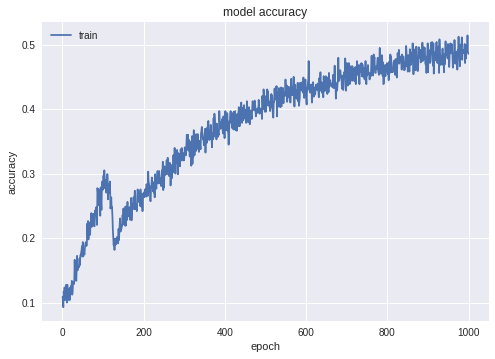

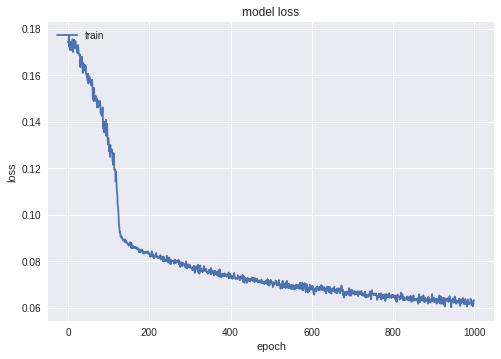

120/120 [==============================] - 0s 509us/step
Test loss: 0.08952942639589309
Test accuracy: 0.21666666666666667
(120, 10)
[[0 1 3 1 1 2 2 1 1 0]
 [0 3 1 1 0 1 1 1 3 1]
 [0 0 6 0 1 0 1 2 2 0]
 [1 3 0 2 1 2 2 0 1 0]
 [1 1 3 2 1 0 1 0 3 0]
 [0 5 0 4 1 2 0 0 0 0]
 [0 1 1 0 1 1 2 1 3 2]
 [0 0 3 2 1 0 0 4 1 1]
 [0 2 4 0 1 1 0 1 3 0]
 [0 0 1 0 1 0 3 2 2 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.19      0.25      0.21        12
           2       0.27      0.50      0.35        12
           3       0.17      0.17      0.17        12
           4       0.11      0.08      0.10        12
           5       0.22      0.17      0.19        12
           6       0.17      0.17      0.17        12
           7       0.33      0.33      0.33        12
           8       0.16      0.25      0.19        12
           9       0.43      0.25      0.32        12

   micro avg       0.22      0.22      0

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 0.1757 - acc: 0.0837 - mean_absolute_error: 0.1837 - val_loss: 0.1650 - val_acc: 0.1167 - val_mean_absolute_error: 0.1787
Epoch 2/1000
 - 1s - loss: 0.1722 - acc: 0.0908 - mean_absolute_error: 0.1820 - val_loss: 0.1605 - val_acc: 0.1500 - val_mean_absolute_error: 0.1713
Epoch 3/1000
 - 1s - loss: 0.1679 - acc: 0.1112 - mean_absolute_error: 0.1773 - val_loss: 0.1601 - val_acc: 0.1278 - val_mean_absolute_error: 0.1756
Epoch 4/1000
 - 1s - loss: 0.1691 - acc: 0.1061 - mean_absolute_error: 0.1795 - val_loss: 0.1675 - val_acc: 0.0944 - val_mean_absolute_error: 0.1796
Epoch 5/1000
 - 1s - loss: 0.1685 - acc: 0.1173 - mean_absolute_error: 0.1767 - val_loss: 0.1697 - val_acc: 0.1056 - val_mean_absolute_error: 0.1788
Epoch 6/1000
 - 1s - loss: 0.1670 - acc: 0.1143 - mean_absolute_error: 0.1770 - val_loss: 0.1656 - val_acc: 0.1000 - val_mean_absolute_error: 0.1782
Epoch 7/1000
 - 1s - loss: 0.1667 - acc: 0.1286 - mean_absol

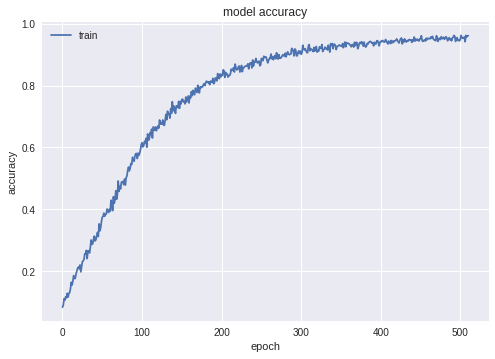

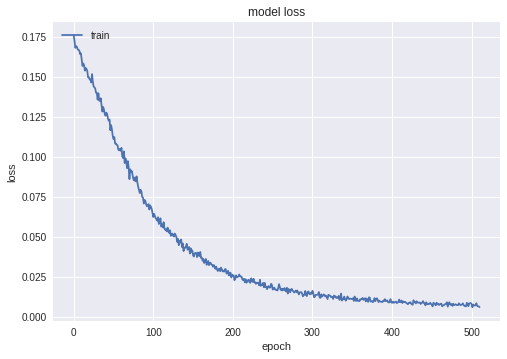

120/120 [==============================] - 0s 669us/step
Test loss: 0.060626041640837985
Test accuracy: 0.6416666706403097
(120, 10)
[[ 5  0  2  0  0  0  3  0  1  1]
 [ 0  6  0  0  1  0  0  0  5  0]
 [ 6  0  6  0  0  0  0  0  0  0]
 [ 1  0  0  7  2  0  0  0  1  1]
 [ 0  0  0  0 11  1  0  0  0  0]
 [ 0  1  0  0  0 10  0  0  1  0]
 [ 1  0  0  0  0  0  9  0  0  2]
 [ 1  0  0  0  0  0  0  7  0  4]
 [ 0  0  0  1  0  0  0  0 11  0]
 [ 2  0  0  0  1  0  3  0  1  5]]
              precision    recall  f1-score   support

           0       0.31      0.42      0.36        12
           1       0.86      0.50      0.63        12
           2       0.75      0.50      0.60        12
           3       0.88      0.58      0.70        12
           4       0.73      0.92      0.81        12
           5       0.91      0.83      0.87        12
           6       0.60      0.75      0.67        12
           7       1.00      0.58      0.74        12
           8       0.55      0.92      0.69      

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 0.1703 - acc: 0.1000 - mean_absolute_error: 0.1790 - val_loss: 0.1656 - val_acc: 0.1056 - val_mean_absolute_error: 0.1816
Epoch 2/1000
 - 1s - loss: 0.1717 - acc: 0.1020 - mean_absolute_error: 0.1799 - val_loss: 0.1659 - val_acc: 0.0889 - val_mean_absolute_error: 0.1811
Epoch 3/1000
 - 1s - loss: 0.1673 - acc: 0.1163 - mean_absolute_error: 0.1770 - val_loss: 0.1688 - val_acc: 0.0944 - val_mean_absolute_error: 0.1818
Epoch 4/1000
 - 1s - loss: 0.1682 - acc: 0.1173 - mean_absolute_error: 0.1772 - val_loss: 0.1650 - val_acc: 0.1056 - val_mean_absolute_error: 0.1785
Epoch 5/1000
 - 1s - loss: 0.1680 - acc: 0.1143 - mean_absolute_error: 0.1771 - val_loss: 0.1645 - val_acc: 0.1000 - val_mean_absolute_error: 0.1786
Epoch 6/1000
 - 1s - loss: 0.1657 - acc: 0.1245 - mean_absolute_error: 0.1746 - val_loss: 0.1632 - val_acc: 0.1167 - val_mean_absolute_error: 0.1770
Epoch 7/1000
 - 1s - loss: 0.1601 - acc: 0.1592 - mean_absol

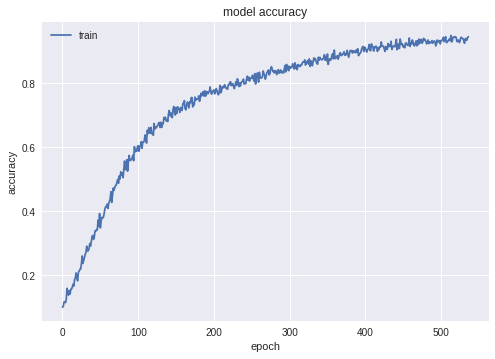

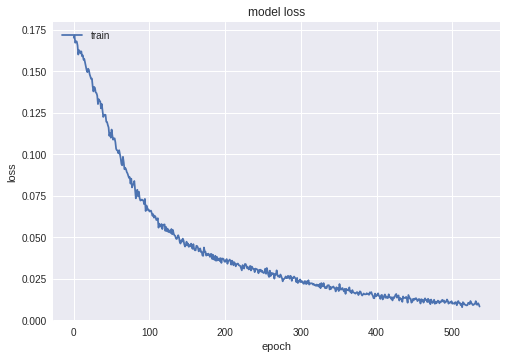

120/120 [==============================] - 0s 637us/step
Test loss: 0.06557510644197465
Test accuracy: 0.575
(120, 10)
[[ 3  0  2  0  0  0  1  0  5  1]
 [ 1  9  0  1  0  0  1  0  0  0]
 [ 0  0  5  0  1  0  0  1  4  1]
 [ 2  2  0  7  0  0  1  0  0  0]
 [ 0  0  1  0  9  0  2  0  0  0]
 [ 1  0  0  1  0 10  0  0  0  0]
 [ 1  2  1  1  0  1  6  0  0  0]
 [ 1  0  0  0  1  0  0  8  0  2]
 [ 2  1  1  0  0  0  0  0  8  0]
 [ 2  0  2  1  0  0  2  0  1  4]]
              precision    recall  f1-score   support

           0       0.23      0.25      0.24        12
           1       0.64      0.75      0.69        12
           2       0.42      0.42      0.42        12
           3       0.64      0.58      0.61        12
           4       0.82      0.75      0.78        12
           5       0.91      0.83      0.87        12
           6       0.46      0.50      0.48        12
           7       0.89      0.67      0.76        12
           8       0.44      0.67      0.53        12
         

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(5), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 0.1764 - acc: 0.1000 - mean_absolute_error: 0.1807 - val_loss: 0.1776 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 2/1000
 - 1s - loss: 0.1758 - acc: 0.1051 - mean_absolute_error: 0.1788 - val_loss: 0.1792 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 3/1000
 - 1s - loss: 0.1730 - acc: 0.1194 - mean_absolute_error: 0.1767 - val_loss: 0.1774 - val_acc: 0.1056 - val_mean_absolute_error: 0.1796
Epoch 4/1000
 - 1s - loss: 0.1728 - acc: 0.1112 - mean_absolute_error: 0.1774 - val_loss: 0.1712 - val_acc: 0.1056 - val_mean_absolute_error: 0.1768
Epoch 5/1000
 - 1s - loss: 0.1734 - acc: 0.1051 - mean_absolute_error: 0.1784 - val_loss: 0.1655 - val_acc: 0.1444 - val_mean_absolute_error: 0.1717
Epoch 6/1000
 - 1s - loss: 0.1707 - acc: 0.1224 - mean_absolute_error: 0.1752 - val_loss: 0.1615 - val_acc: 0.1500 - val_mean_absolute_error: 0.1688
Epoch 7/1000
 - 1s - loss: 0.1710 - acc: 0.1224 - mean_absol

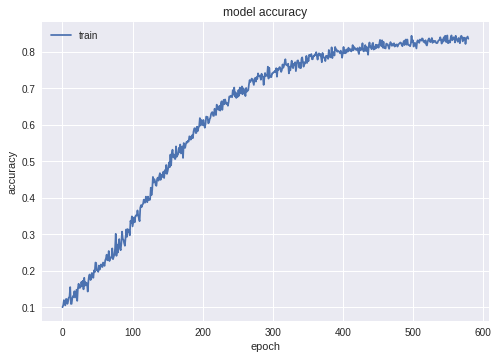

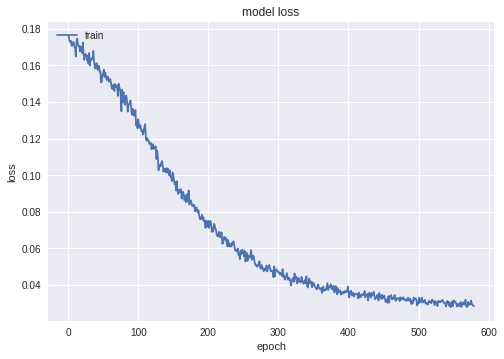

120/120 [==============================] - 0s 583us/step
Test loss: 0.06535291597247124
Test accuracy: 0.6333333333333333
(120, 10)
[[ 7  0  0  0  0  0  5  0  0  0]
 [ 0  8  0  0  0  2  0  0  1  1]
 [ 9  0  0  0  0  0  2  0  1  0]
 [ 2  0  0  7  0  0  0  0  0  3]
 [ 0  0  0  0 11  1  0  0  0  0]
 [ 0  2  0  0  0 10  0  0  0  0]
 [ 1  0  0  0  0  1  9  0  0  1]
 [ 0  0  0  1  0  0  0  9  0  2]
 [ 2  1  0  0  0  0  1  0  8  0]
 [ 2  0  0  1  0  0  1  0  1  7]]
              precision    recall  f1-score   support

           0       0.30      0.58      0.40        12
           1       0.73      0.67      0.70        12
           2       0.00      0.00      0.00        12
           3       0.78      0.58      0.67        12
           4       1.00      0.92      0.96        12
           5       0.71      0.83      0.77        12
           6       0.50      0.75      0.60        12
           7       1.00      0.75      0.86        12
           8       0.73      0.67      0.70       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 0.1740 - acc: 0.0898 - mean_absolute_error: 0.1822 - val_loss: 0.1723 - val_acc: 0.1222 - val_mean_absolute_error: 0.1762
Epoch 2/1000
 - 1s - loss: 0.1769 - acc: 0.1000 - mean_absolute_error: 0.1800 - val_loss: 0.1769 - val_acc: 0.1056 - val_mean_absolute_error: 0.1783
Epoch 3/1000
 - 1s - loss: 0.1762 - acc: 0.1082 - mean_absolute_error: 0.1783 - val_loss: 0.1800 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 4/1000
 - 1s - loss: 0.1795 - acc: 0.1020 - mean_absolute_error: 0.1796 - val_loss: 0.1800 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 5/1000
 - 1s - loss: 0.1794 - acc: 0.1020 - mean_absolute_error: 0.1796 - val_loss: 0.1800 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 6/1000
 - 1s - loss: 0.1797 - acc: 0.1000 - mean_absolute_error: 0.1799 - val_loss: 0.1800 - val_acc: 0.1000 - val_mean_absolute_error: 0.1800
Epoch 7/1000
 - 1s - loss: 0.1775 - acc: 0.1071 - mean_absol

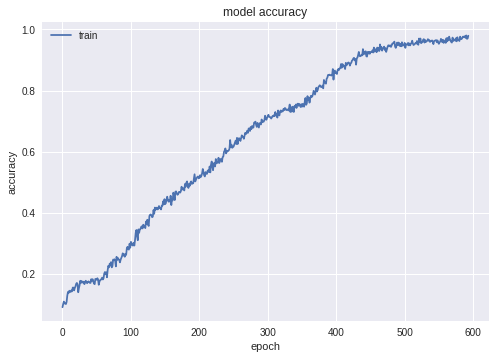

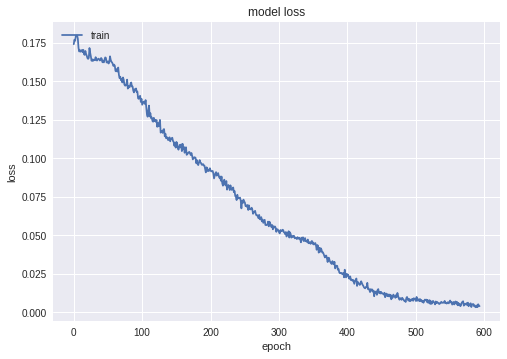

120/120 [==============================] - 0s 573us/step
Test loss: 0.05719296062986056
Test accuracy: 0.6333333333333333
(120, 10)
[[ 5  0  3  0  0  0  3  0  0  1]
 [ 0 10  0  0  0  0  0  0  1  1]
 [ 2  0  7  0  0  0  3  0  0  0]
 [ 0  1  0  5  1  0  2  0  1  2]
 [ 0  0  0  2  6  4  0  0  0  0]
 [ 0  0  0  0  1 11  0  0  0  0]
 [ 1  0  0  1  0  0  9  0  0  1]
 [ 0  3  1  0  0  0  0  8  0  0]
 [ 0  0  2  1  0  0  0  0  9  0]
 [ 1  0  3  1  0  0  1  0  0  6]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.71      0.83      0.77        12
           2       0.44      0.58      0.50        12
           3       0.50      0.42      0.45        12
           4       0.75      0.50      0.60        12
           5       0.73      0.92      0.81        12
           6       0.50      0.75      0.60        12
           7       1.00      0.67      0.80        12
           8       0.82      0.75      0.78       

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

d:  0.3
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 2s - loss: 0.1737 - acc: 0.0939 - mean_absolute_error: 0.1809 - val_loss: 0.1677 - val_acc: 0.1111 - val_mean_absolute_error: 0.1776
Epoch 2/1000
 - 1s - loss: 0.1723 - acc: 0.1122 - mean_absolute_error: 0.1785 - val_loss: 0.1720 - val_acc: 0.1167 - val_mean_absolute_error: 0.1775
Epoch 3/1000
 - 1s - loss: 0.1677 - acc: 0.1337 - mean_absolute_error: 0.1736 - val_loss: 0.1620 - val_acc: 0.1389 - val_mean_absolute_error: 0.1721
Epoch 4/1000
 - 1s - loss: 0.1697 - acc: 0.1296 - mean_absolute_error: 0.1747 - val_loss: 0.1711 - val_acc: 0.1278 - val_mean_absolute_error: 0.1754
Epoch 5/1000
 - 1s - loss: 0.1728 - acc: 0.1153 - mean_absolute_error: 0.1770 - val_loss: 0.1688 - val_acc: 0.1278 

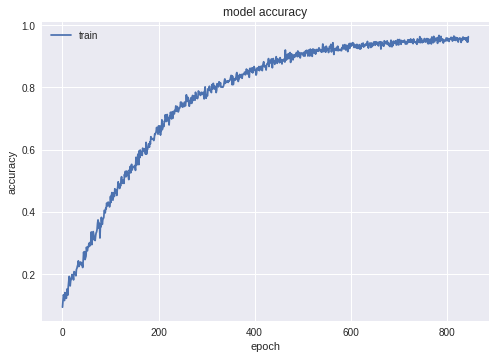

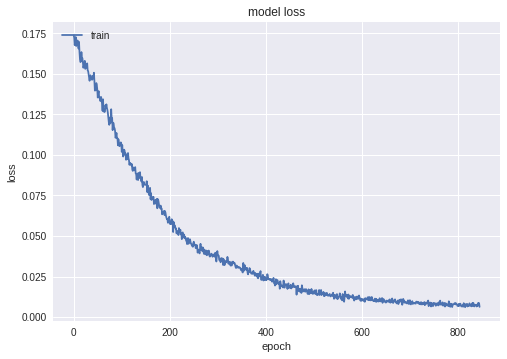

120/120 [==============================] - 0s 665us/step
Test loss: 0.06745033164819082
Test accuracy: 0.599999996026357
(120, 10)
[[ 7  0  0  2  0  0  2  0  1  0]
 [ 0  7  0  0  0  1  0  0  1  3]
 [ 2  0  8  0  0  0  1  1  0  0]
 [ 0  1  0  7  1  0  0  0  2  1]
 [ 0  2  0  2  4  3  1  0  0  0]
 [ 0  1  0  0  0 11  0  0  0  0]
 [ 2  0  0  0  0  1  7  0  2  0]
 [ 0  1  0  0  0  0  0  7  0  4]
 [ 0  0  2  0  0  0  2  0  7  1]
 [ 1  0  0  2  0  0  1  1  0  7]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.58      0.58      0.58        12
           2       0.80      0.67      0.73        12
           3       0.54      0.58      0.56        12
           4       0.80      0.33      0.47        12
           5       0.69      0.92      0.79        12
           6       0.50      0.58      0.54        12
           7       0.78      0.58      0.67        12
           8       0.54      0.58      0.56        

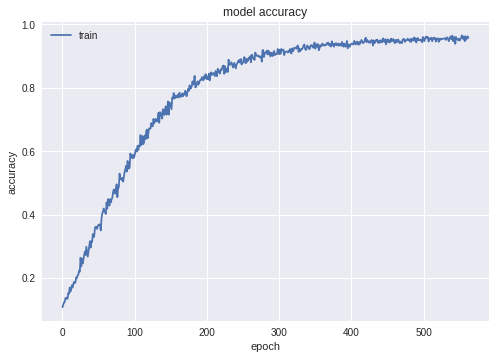

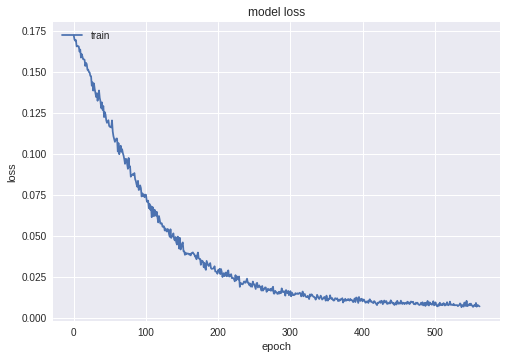

120/120 [==============================] - 0s 642us/step
Test loss: 0.05818358485897382
Test accuracy: 0.625000003973643
(120, 10)
[[ 2  0  7  2  0  0  1  0  0  0]
 [ 0  7  1  1  0  3  0  0  0  0]
 [ 2  0  9  0  0  0  0  0  0  1]
 [ 0  3  0  6  0  0  0  0  0  3]
 [ 0  0  0  0 10  2  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 1  0  1  0  0  0  6  0  2  2]
 [ 0  0  0  0  0  0  1  7  1  3]
 [ 0  1  3  0  0  0  0  0  8  0]
 [ 0  0  0  2  0  1  1  0  0  8]]
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.64      0.58      0.61        12
           2       0.43      0.75      0.55        12
           3       0.55      0.50      0.52        12
           4       1.00      0.83      0.91        12
           5       0.67      1.00      0.80        12
           6       0.67      0.50      0.57        12
           7       1.00      0.58      0.74        12
           8       0.73      0.67      0.70        

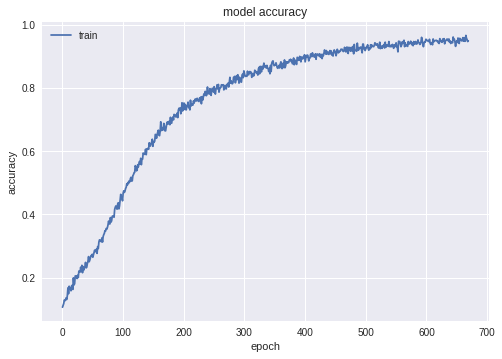

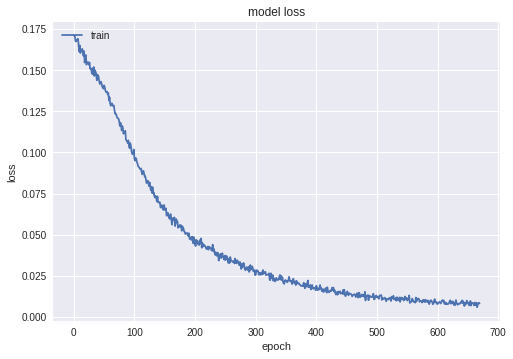

120/120 [==============================] - 0s 649us/step
Test loss: 0.07005084206660589
Test accuracy: 0.5416666646798451
(120, 10)
[[ 3  0  3  0  0  0  6  0  0  0]
 [ 0 10  0  0  1  1  0  0  0  0]
 [ 4  0  5  0  0  0  2  1  0  0]
 [ 1  1  0  4  3  0  0  2  0  1]
 [ 0  0  0  1  8  3  0  0  0  0]
 [ 0  4  0  0  1  7  0  0  0  0]
 [ 1  0  0  0  0  0 10  0  0  1]
 [ 1  0  0  0  1  0  0  8  2  0]
 [ 0  1  2  0  0  0  2  0  7  0]
 [ 3  0  3  1  0  0  2  0  0  3]]
              precision    recall  f1-score   support

           0       0.23      0.25      0.24        12
           1       0.62      0.83      0.71        12
           2       0.38      0.42      0.40        12
           3       0.67      0.33      0.44        12
           4       0.57      0.67      0.62        12
           5       0.64      0.58      0.61        12
           6       0.45      0.83      0.59        12
           7       0.73      0.67      0.70        12
           8       0.78      0.58      0.67       

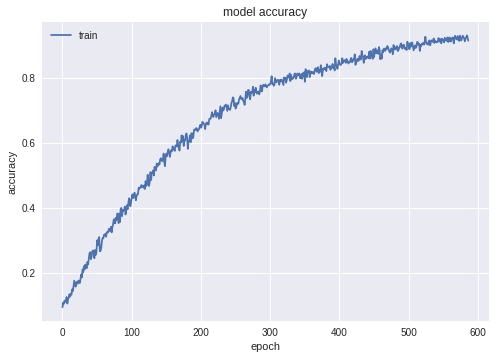

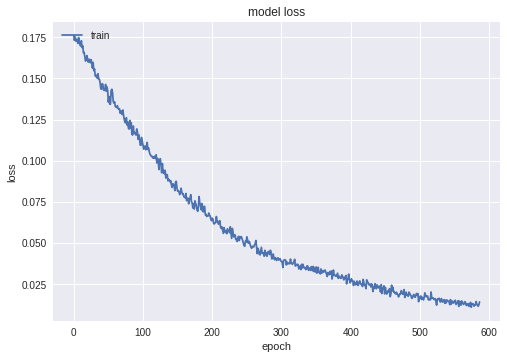

120/120 [==============================] - 0s 629us/step
Test loss: 0.06275770589709281
Test accuracy: 0.6
(120, 10)
[[ 3  0  2  0  0  0  3  0  3  1]
 [ 0  9  0  0  0  1  0  0  1  1]
 [ 0  0  9  0  0  0  2  1  0  0]
 [ 2  0  0  3  1  0  0  2  0  4]
 [ 0  1  0  1  6  1  0  2  0  1]
 [ 0  3  0  0  0  9  0  0  0  0]
 [ 2  0  0  0  1  0  8  0  0  1]
 [ 0  3  0  0  0  0  0  7  0  2]
 [ 0  0  0  1  1  0  0  0 10  0]
 [ 1  0  0  0  1  0  1  1  0  8]]
              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.56      0.75      0.64        12
           2       0.82      0.75      0.78        12
           3       0.60      0.25      0.35        12
           4       0.60      0.50      0.55        12
           5       0.82      0.75      0.78        12
           6       0.57      0.67      0.62        12
           7       0.54      0.58      0.56        12
           8       0.71      0.83      0.77        12
           

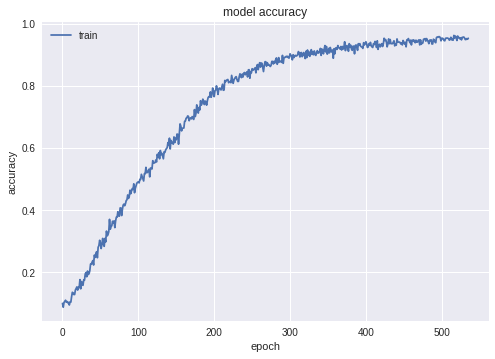

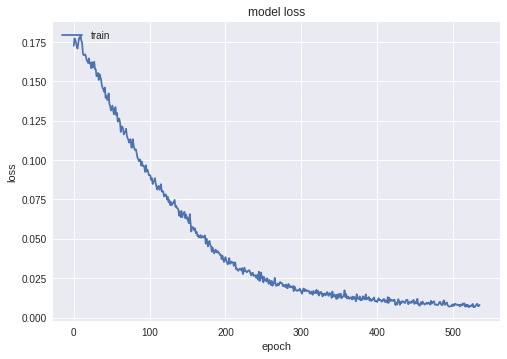

120/120 [==============================] - 0s 753us/step
Test loss: 0.05914407620827357
Test accuracy: 0.6333333333333333
(120, 10)
[[ 5  0  1  0  0  0  4  0  1  1]
 [ 1  9  0  0  0  1  0  0  1  0]
 [ 1  0  7  0  0  0  1  1  2  0]
 [ 2  1  0  7  0  0  0  0  0  2]
 [ 0  1  0  0 11  0  0  0  0  0]
 [ 0  2  0  1  0  9  0  0  0  0]
 [ 2  0  1  0  0  0  8  0  0  1]
 [ 1  0  0  0  0  0  0  8  1  2]
 [ 0  0  4  0  0  0  1  0  7  0]
 [ 2  0  0  1  0  0  3  1  0  5]]
              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.69      0.75      0.72        12
           2       0.54      0.58      0.56        12
           3       0.78      0.58      0.67        12
           4       1.00      0.92      0.96        12
           5       0.90      0.75      0.82        12
           6       0.47      0.67      0.55        12
           7       0.80      0.67      0.73        12
           8       0.58      0.58      0.58       

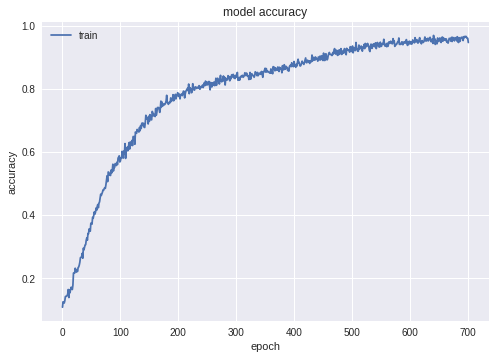

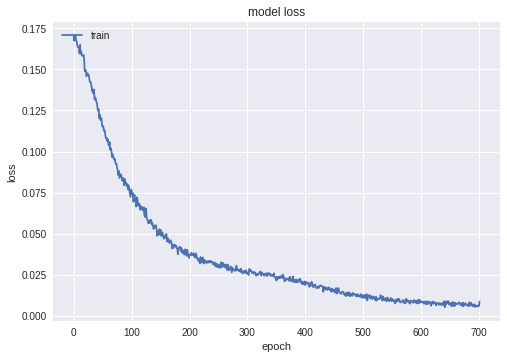

120/120 [==============================] - 0s 613us/step
Test loss: 0.05904020468393962
Test accuracy: 0.625
(120, 10)
[[10  0  0  0  0  0  2  0  0  0]
 [ 0  8  0  0  0  2  0  0  1  1]
 [ 2  0  4  0  0  0  4  0  1  1]
 [ 0  0  0  8  1  0  0  0  0  3]
 [ 0  0  0  1  8  2  0  0  1  0]
 [ 0  1  0  1  0 10  0  0  0  0]
 [ 3  0  0  1  0  0  8  0  0  0]
 [ 1  1  0  2  2  0  1  4  0  1]
 [ 0  1  3  0  0  0  0  0  8  0]
 [ 1  0  1  0  0  0  3  0  0  7]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.73      0.67      0.70        12
           2       0.50      0.33      0.40        12
           3       0.62      0.67      0.64        12
           4       0.73      0.67      0.70        12
           5       0.71      0.83      0.77        12
           6       0.44      0.67      0.53        12
           7       1.00      0.33      0.50        12
           8       0.73      0.67      0.70        12
         

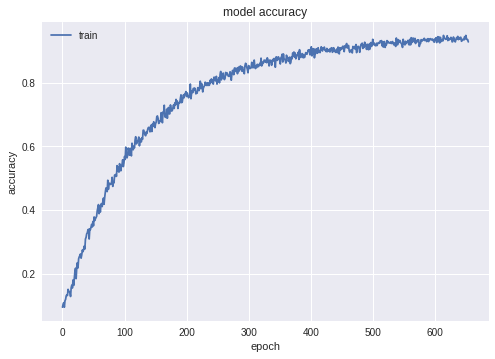

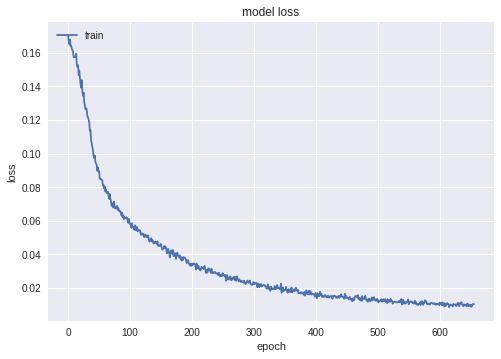

120/120 [==============================] - 0s 648us/step
Test loss: 0.07214795798063278
Test accuracy: 0.5250000019868215
(120, 10)
[[ 6  0  1  0  0  0  3  2  0  0]
 [ 0  7  0  0  0  4  0  0  1  0]
 [ 4  0  6  0  0  0  1  0  1  0]
 [ 0  1  0  6  1  2  0  0  1  1]
 [ 0  0  0  0  5  2  2  0  0  3]
 [ 0  0  0  0  1 11  0  0  0  0]
 [ 2  0  0  0  2  0  6  0  0  2]
 [ 0  0  0  1  0  0  2  8  0  1]
 [ 1  0  0  0  2  0  4  1  4  0]
 [ 2  0  2  0  0  0  3  0  1  4]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        12
           1       0.88      0.58      0.70        12
           2       0.67      0.50      0.57        12
           3       0.86      0.50      0.63        12
           4       0.45      0.42      0.43        12
           5       0.58      0.92      0.71        12
           6       0.29      0.50      0.36        12
           7       0.73      0.67      0.70        12
           8       0.50      0.33      0.40       

In [0]:
d = 0.3
while(d <=0.9):
    print("d: ",d)
    model = Sequential()
    model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                     data_format="channels_last"))
    model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                     data_format="channels_last"))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
                  metrics=['accuracy', 'mae'])
    callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                               verbose=0, mode='auto', baseline=None, 
                               restore_best_weights=True)]
    history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                        validation_data = (val_x, val_y), callbacks=callbacks)
    model.summary()
    print("Model Created") 

    #plotting training
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #testing
    score = model.evaluate(test_x, test_y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    pred_y = model.predict(test_x)
    print(pred_y.shape)
    predy = np.argmax(pred_y, axis=1).T
    print(confusion_matrix(testy[0:120], predy))
    print(classification_report(testy[0:120], predy))
    d = d + 0.1

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 2s - loss: 0.1676 - acc: 0.1235 - mean_absolute_error: 0.1748 - val_loss: 0.1632 - val_acc: 0.1389 - val_mean_absolute_error: 0.1732
Epoch 2/1000
 - 1s - loss: 0.1703 - acc: 0.1163 - mean_absolute_error: 0.1768 - val_loss: 0.1622 - val_acc: 0.1444 - val_mean_absolute_error: 0.1712
Epoch 3/1000
 - 1s - loss: 0.1668 - acc: 0.1296 - mean_absolute_error: 0.1744 - val_loss: 0.1717 - val_acc: 0.1278 - val_mean_absolute_error: 0.1742
Epoch 4/1000
 - 1s - loss: 0.1726 - acc: 0.1184 - mean_absolute_error: 0.1761 - val_loss: 0.1630 - val_acc: 0.1667 - val_mean_absolute_error: 0.1667
Epoch 5/1000
 - 1s - loss: 0.1640 - acc: 0.1561 - mean_absolute_error: 0.1688 - val_loss: 0.1586 - val_acc: 0.1778 - val_mean_absolute_error: 0.1648
Epoch 6/1000
 - 1s - loss: 0.1661 - acc: 0.1398 - mean_absolute_error: 0.1719 - val_loss: 0.1633 - val_acc: 0.1444 - val_mean_absolute_error: 0.1698
Epoch 7/1000
 - 1s - loss: 0.1610 - acc: 0.1592 - mean_absol

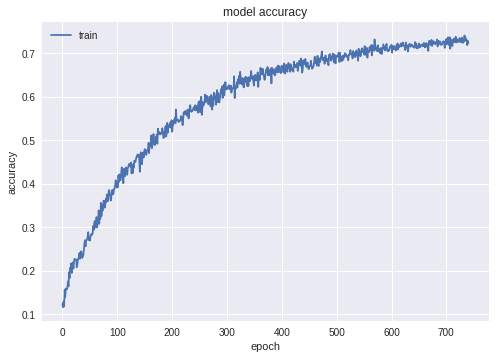

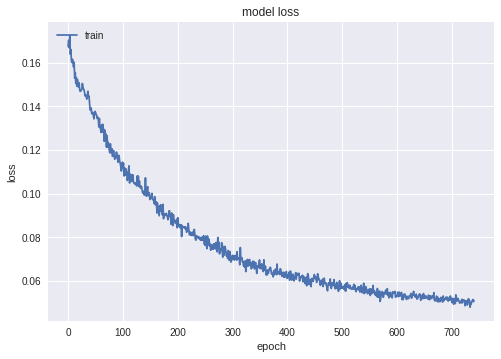

120/120 [==============================] - 0s 648us/step
Test loss: 0.0848171683649222
Test accuracy: 0.5333333373069763
(120, 10)
[[ 3  0  3  2  0  0  4  0  0  0]
 [ 0  0  0  1  0  0  3  1  3  4]
 [ 1  0 10  0  0  0  0  1  0  0]
 [ 0  0  0  7  0  0  1  0  2  2]
 [ 0  0  0  0  0  8  3  0  0  1]
 [ 0  0  0  0  0 10  2  0  0  0]
 [ 1  0  3  0  0  0  7  0  0  1]
 [ 0  0  0  1  0  0  0  8  2  1]
 [ 0  0  1  1  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  1  1  1  9]]
              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.00      0.00      0.00        12
           2       0.59      0.83      0.69        12
           3       0.58      0.58      0.58        12
           4       0.00      0.00      0.00        12
           5       0.56      0.83      0.67        12
           6       0.33      0.58      0.42        12
           7       0.73      0.67      0.70        12
           8       0.56      0.83      0.67        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(15, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.adagrad(lr=0.001, epsilon=None, decay=0.0),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 3s - loss: 0.1750 - acc: 0.0918 - mean_absolute_error: 0.1819 - val_loss: 0.1742 - val_acc: 0.0667 - val_mean_absolute_error: 0.1854
Epoch 2/1000
 - 1s - loss: 0.1748 - acc: 0.0847 - mean_absolute_error: 0.1828 - val_loss: 0.1673 - val_acc: 0.1111 - val_mean_absolute_error: 0.1782
Epoch 3/1000
 - 1s - loss: 0.1729 - acc: 0.0959 - mean_absolute_error: 0.1802 - val_loss: 0.1667 - val_acc: 0.1167 - val_mean_absolute_error: 0.1782
Epoch 4/1000
 - 1s - loss: 0.1714 - acc: 0.1031 - mean_absolute_error: 0.1792 - val_loss: 0.1689 - val_acc: 0.1167 - val_mean_absolute_error: 0.1779
Epoch 5/1000
 - 1s - loss: 0.1719 - acc: 0.1010 - mean_absolute_error: 0.1803 - val_loss: 0.1670 - val_acc: 0.1278 - val_mean_absolute_error: 0.1768
Epoch 6/1000
 - 1s - loss: 0.1718 - acc: 0.1031 - mean_absolute_error: 0.1790 - val_loss: 0.1646 - val_acc: 0.1333 - val_mean_absolute_error: 0.1747
Epoch 7/1000
 - 1s - loss: 0.1687 - acc: 0.1143 - mean_absol

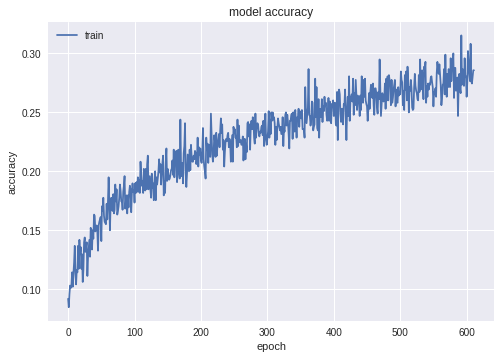

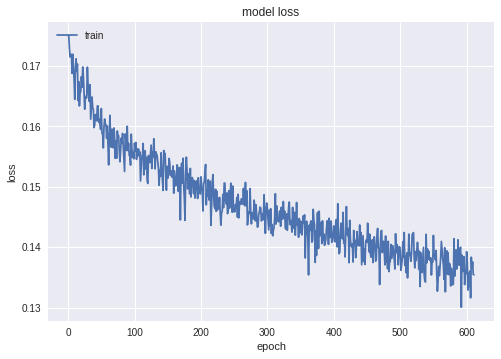

120/120 [==============================] - 0s 658us/step
Test loss: 0.14985910455385845
Test accuracy: 0.1916666656732559
(120, 10)
[[2 0 0 0 0 0 5 3 0 2]
 [0 0 0 3 0 1 4 2 1 1]
 [2 0 0 2 0 0 4 4 0 0]
 [0 0 0 1 0 2 0 3 1 5]
 [0 0 0 1 0 5 3 3 0 0]
 [0 0 0 2 0 2 7 1 0 0]
 [1 0 0 1 0 2 7 1 0 0]
 [0 0 0 1 0 0 3 6 0 2]
 [1 0 0 1 0 0 6 0 0 4]
 [0 0 0 2 0 1 2 2 0 5]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12
           3       0.07      0.08      0.08        12
           4       0.00      0.00      0.00        12
           5       0.15      0.17      0.16        12
           6       0.17      0.58      0.26        12
           7       0.24      0.50      0.32        12
           8       0.00      0.00      0.00        12
           9       0.26      0.42      0.32        12

   micro avg       0.19      0.19      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.adagrad(lr=0.001, epsilon=None, decay=0.0),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 3s - loss: 0.1723 - acc: 0.0980 - mean_absolute_error: 0.1804 - val_loss: 0.1577 - val_acc: 0.1500 - val_mean_absolute_error: 0.1704
Epoch 2/1000
 - 1s - loss: 0.1712 - acc: 0.1092 - mean_absolute_error: 0.1781 - val_loss: 0.1632 - val_acc: 0.1389 - val_mean_absolute_error: 0.1710
Epoch 3/1000
 - 1s - loss: 0.1698 - acc: 0.1163 - mean_absolute_error: 0.1763 - val_loss: 0.1652 - val_acc: 0.1333 - val_mean_absolute_error: 0.1731
Epoch 4/1000
 - 1s - loss: 0.1710 - acc: 0.1143 - mean_absolute_error: 0.1774 - val_loss: 0.1595 - val_acc: 0.1500 - val_mean_absolute_error: 0.1699
Epoch 5/1000
 - 1s - loss: 0.1717 - acc: 0.1010 - mean_absolute_error: 0.1796 - val_loss: 0.1692 - val_acc: 0.1222 - val_mean_absolute_error: 0.1758
Epoch 6/1000
 - 1s - loss: 0.1716 - acc: 0.1071 - mean_absolute_error: 0.1786 - val_loss: 0.1679 - val_acc: 0.1222 - val_mean_absolute_error: 0.1752
Epoch 7/1000
 - 1s - loss: 0.1688 - acc: 0.1214 - mean_absol

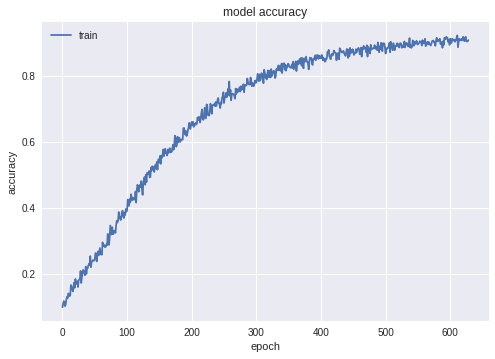

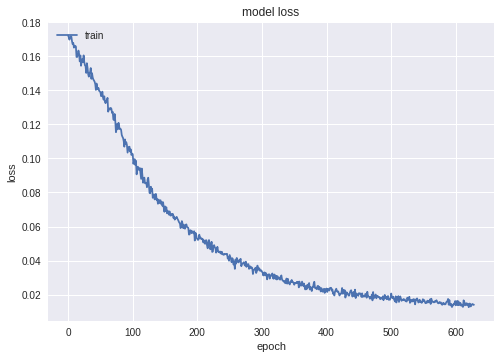

120/120 [==============================] - 0s 552us/step
Test loss: 0.05447990298271179
Test accuracy: 0.6333333333333333
(120, 10)
[[ 4  0  3  0  0  0  1  1  0  3]
 [ 0  7  0  0  2  1  0  1  0  1]
 [ 4  0  6  0  0  0  1  0  1  0]
 [ 3  0  2  6  1  0  0  0  0  0]
 [ 0  0  0  0 10  2  0  0  0  0]
 [ 0  1  0  0  1 10  0  0  0  0]
 [ 2  0  2  0  0  0  7  0  1  0]
 [ 1  0  1  0  0  0  0  8  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 1  1  0  0  0  0  2  0  1  7]]
              precision    recall  f1-score   support

           0       0.27      0.33      0.30        12
           1       0.78      0.58      0.67        12
           2       0.43      0.50      0.46        12
           3       1.00      0.50      0.67        12
           4       0.67      0.83      0.74        12
           5       0.77      0.83      0.80        12
           6       0.64      0.58      0.61        12
           7       0.80      0.67      0.73        12
           8       0.79      0.92      0.85       

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 3s - loss: 2.0709 - acc: 0.8189 - mean_absolute_error: 0.1820 - val_loss: 1.4364 - val_acc: 0.8272 - val_mean_absolute_error: 0.1795
Epoch 2/1000
 - 1s - loss: 1.1793 - acc: 0.8361 - mean_absolute_error: 0.1728 - val_loss: 0.4319 - val_acc: 0.8794 - val_mean_absolute_error: 0.1716
Epoch 3/1000
 - 1s - loss: 0.3874 - acc: 0.8882 - mean_absolute_error: 0.1774 - val_loss: 0.3248 - val_acc: 0.8994 - val_mean_absolute_error: 0.1790
Epoch 4/1000
 - 1s - loss: 0.3255 - acc: 0.8998 - mean_absolute_error: 0.1791 - val_loss: 0.3238 - val_acc: 0.8994 - val_mean_absolute_error: 0.1793
Epoch 5/1000
 - 1s - loss: 0.3238 - acc: 0.8999 - mean_absolute_error: 0.1791 - val_loss: 0.3232 - val_acc: 0.8994 - val_mean_absolute_error: 0.1793
Epoch 6/1000
 - 1s - loss: 0.3232 - acc: 0.8999 - mean_absolute_error: 0.1790 - val_loss: 0.3226 - val_acc: 0.8994 - val_mean_absolute_error: 0.1792
Epoch 7/1000
 - 1s - loss: 0.3219 - acc: 0.9001 - mean_absol

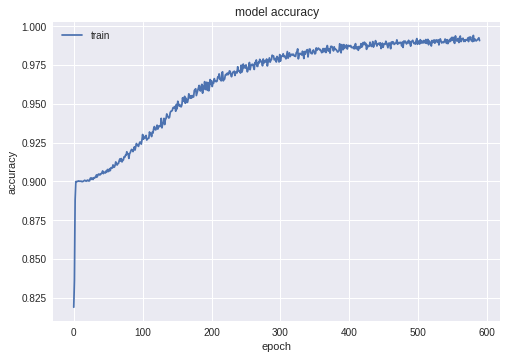

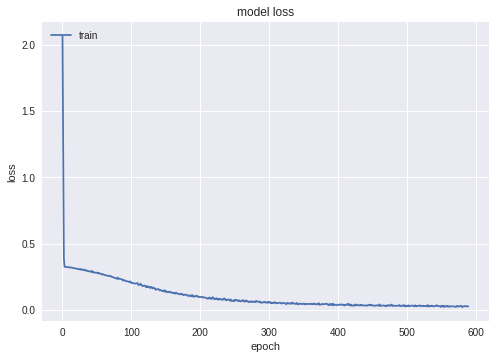

120/120 [==============================] - 0s 593us/step
Test loss: 0.2965488036473592
Test accuracy: 0.9116666515668234
(120, 10)
[[ 5  0  4  0  0  0  2  0  0  1]
 [ 0  6  0  1  2  1  0  1  0  1]
 [ 1  0  9  0  0  0  2  0  0  0]
 [ 1  1  1  5  1  1  1  1  0  0]
 [ 0  0  0  0 10  2  0  0  0  0]
 [ 0  2  0  0  3  5  0  0  2  0]
 [ 5  0  1  2  0  1  2  0  0  1]
 [ 0  0  0  2  2  1  0  7  0  0]
 [ 0  2  4  1  0  0  0  0  5  0]
 [ 2  0  1  1  0  0  2  0  0  6]]
              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.55      0.50      0.52        12
           2       0.45      0.75      0.56        12
           3       0.42      0.42      0.42        12
           4       0.56      0.83      0.67        12
           5       0.45      0.42      0.43        12
           6       0.22      0.17      0.19        12
           7       0.78      0.58      0.67        12
           8       0.71      0.42      0.53        

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])

test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(testy)

print("Test_y one hot:", test_y.shape)
print(test_x.shape)

score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

Test_y one hot: (240, 10)
(240, 800, 10)
240/240 [==============================] - 0s 592us/step
Test loss: 0.35530224641164143
Test accuracy: 0.8987499793370565
(240, 10)
[[18  0  3  0  0  1  2  0  0  0]
 [12  6  0  1  1  2  0  0  1  1]
 [14  0  5  0  0  0  4  0  1  0]
 [15  3  1  2  0  2  0  0  0  1]
 [12  1  0  1  7  1  0  2  0  0]
 [12  6  0  0  1  5  0  0  0  0]
 [19  0  2  0  0  0  2  0  1  0]
 [13  0  1  2  1  0  0  7  0  0]
 [13  0  4  0  1  0  0  0  5  1]
 [13  0  0  0  2  0  1  0  1  7]]
              precision    recall  f1-score   support

           0       0.13      0.75      0.22        24
           1       0.38      0.25      0.30        24
           2       0.31      0.21      0.25        24
           3       0.33      0.08      0.13        24
           4       0.54      0.29      0.38        24
           5       0.45      0.21      0.29        24
           6       0.22      0.08      0.12        24
           7       0.78      0.29      0.42        24
         

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

#plotting training
plt.plot(history.history('mae'))
plt.title("MAE")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 2s - loss: 2.5749 - mean_absolute_error: 0.1787 - val_loss: 2.8378 - val_mean_absolute_error: 0.1793
Epoch 2/1000
 - 1s - loss: 2.5981 - mean_absolute_error: 0.1781 - val_loss: 2.8036 - val_mean_absolute_error: 0.1798
Epoch 3/1000
 - 1s - loss: 2.4894 - mean_absolute_error: 0.1750 - val_loss: 2.2901 - val_mean_absolute_error: 0.1741
Epoch 4/1000
 - 1s - loss: 2.2334 - mean_absolute_error: 0.1753 - val_loss: 1.5389 - val_mean_absolute_error: 0.1729
Epoch 5/1000
 - 1s - loss: 0.9344 - mean_absolute_error: 0.1756 - val_loss: 0.3534 - val_mean_absolute_error: 0.1788
Epoch 6/1000
 - 1s - loss: 0.3397 - mean_absolute_error: 0.1786 - val_loss: 0.3253 - val_mean_absolute_error: 0.1795
Epoch 7/1000
 - 1

TypeError: ignored

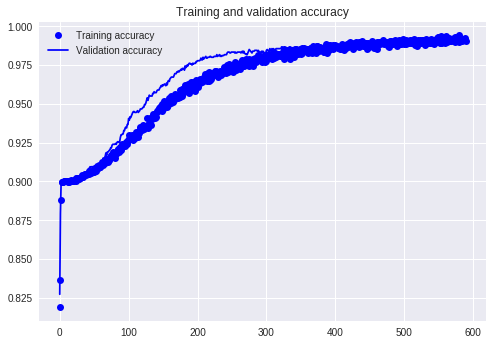

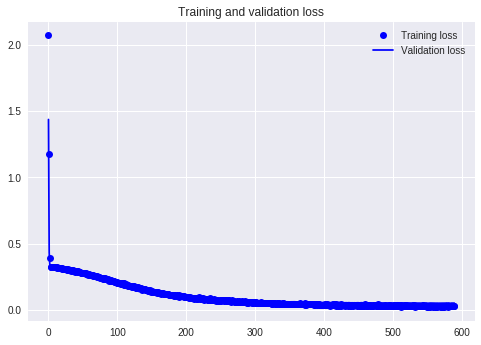

In [0]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
print(predy.shape)
y_test = testy[0:120]
j = 0
for i in range(predy.shape[0]):
    if (predy[i] == y_test[i]):
        j = j + 1
    elif (predy[i] != y_test[i]):
        j = j + 1
        
print(j)

(120,)
120


Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 1.9616 - acc: 0.8249 - mean_absolute_error: 0.1768 - val_loss: 1.0559 - val_acc: 0.8422 - val_mean_absolute_error: 0.1649
Epoch 2/1000
 - 1s - loss: 0.9383 - acc: 0.8484 - mean_absolute_error: 0.1768 - val_loss: 0.3269 - val_acc: 0.9000 - val_mean_absolute_error: 0.1784
Epoch 3/1000
 - 1s - loss: 0.3300 - acc: 0.8999 - mean_absolute_error: 0.1796 - val_loss: 0.3254 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 4/1000
 - 1s - loss: 0.3261 - acc: 0.9000 - mean_absolute_error: 0.1800 - val_loss: 0.3253 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 5/1000
 - 1s - loss: 0.3257 - acc: 0.9000 - mean_absolute_error: 0.1800 - val_loss: 0.3251 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 6/1000
 - 1s - loss: 0.3257 - acc: 0.9000 - mean_absolute_error: 0.1800 - val_loss: 0.3250 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 7/1000
 - 1s - loss: 0.3250 - acc: 0.9000 - mean_absol

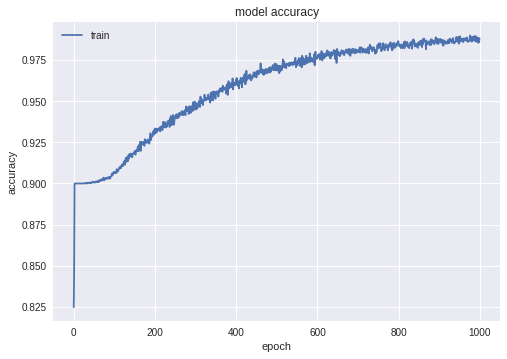

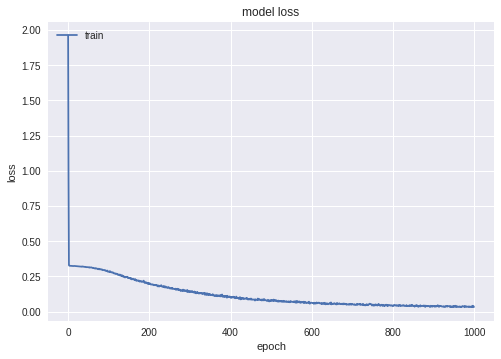

120/120 [==============================] - 0s 547us/step
Test loss: 0.3764188190301259
Test accuracy: 0.8974999705950419
(120, 10)
[[6 0 3 0 0 1 2 0 0 0]
 [0 6 0 1 1 2 0 0 1 1]
 [2 0 5 0 0 0 4 0 1 0]
 [3 3 1 2 0 2 0 0 0 1]
 [0 1 0 1 7 1 0 2 0 0]
 [0 6 0 0 1 5 0 0 0 0]
 [7 0 2 0 0 0 2 0 1 0]
 [1 0 1 2 1 0 0 7 0 0]
 [1 0 4 0 1 0 0 0 5 1]
 [1 0 0 0 2 0 1 0 1 7]]
              precision    recall  f1-score   support

           0       0.29      0.50      0.36        12
           1       0.38      0.50      0.43        12
           2       0.31      0.42      0.36        12
           3       0.33      0.17      0.22        12
           4       0.54      0.58      0.56        12
           5       0.45      0.42      0.43        12
           6       0.22      0.17      0.19        12
           7       0.78      0.58      0.67        12
           8       0.56      0.42      0.48        12
           9       0.70      0.58      0.64        12

   micro avg       0.43      0.43      0.4

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=200, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

(240, 1)
(120,)


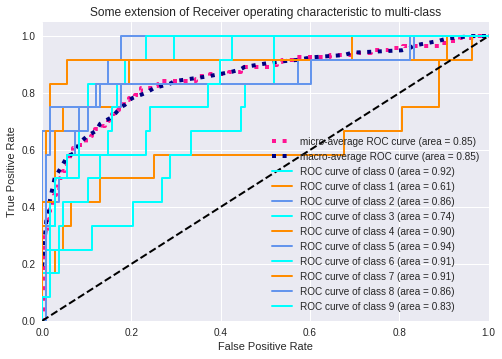

In [0]:
print(testy.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]
#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])
#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in range(nClasses):
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    #trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)
#print(val_y)
#print("Done with Val")
# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (960, 10)
Test_y one hot: (120, 10)
Val_y one hot: (180, 10)
(960, 800, 10)
(120, 800, 10)
(180, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 960 samples, validate on 180 samples
Epoch 1/1500
 - 2s - loss: 2.3111 - acc: 0.8205 - mean_absolute_error: 0.1801 - val_loss: 2.2990 - val_acc: 0.8272 - val_mean_absolute_error: 0.1749
Epoch 2/1500
 - 1s - loss: 2.3807 - acc: 0.8235 - mean_absolute_error: 0.1764 - val_loss: 2.5223 - val_acc: 0.8239 - val_mean_absolute_error: 0.1770
Epoch 3/1500
 - 1s - loss: 2.1367 - acc: 0.8290 - mean_absolute_error: 0.1712 - val_loss: 1.4973 - val_acc: 0.8344 - val_mean_absolute_error: 0.1662
Epoch 4/1500
 - 1s - loss: 0.8728 - acc: 0.8541 - mean_absolute_error: 0.1750 - val_loss: 0.3232 - val_acc: 0.9000 - val_mean_absolute_error: 0.1783
Epoch 5/1500
 - 1s - loss: 0.3278 - acc: 0.8997 - mean_absolute_error: 0.1794 - val_loss: 0.3260 - val_acc: 0.9000 - val_me

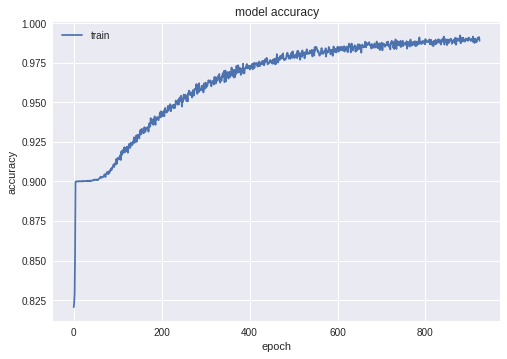

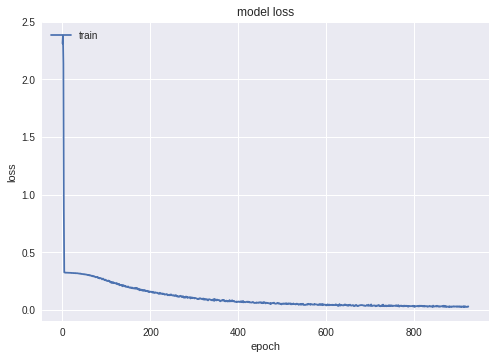

120/120 [==============================] - 0s 585us/step
Test loss: 0.3625729024410248
Test accuracy: 0.8983333269755046
(120, 10)
[[2 2 0 0 0 1 1 0 1 5]
 [1 4 0 0 2 4 0 1 0 0]
 [3 0 2 2 0 0 2 2 0 1]
 [4 2 0 3 1 1 0 1 0 0]
 [0 0 0 0 8 3 0 0 0 1]
 [0 0 0 1 3 7 0 0 1 0]
 [4 1 1 0 0 0 3 1 2 0]
 [1 0 1 0 1 0 0 9 0 0]
 [1 3 1 1 0 0 0 0 4 2]
 [3 0 0 2 1 0 1 1 1 3]]
              precision    recall  f1-score   support

           0       0.11      0.17      0.13        12
           1       0.33      0.33      0.33        12
           2       0.40      0.17      0.24        12
           3       0.33      0.25      0.29        12
           4       0.50      0.67      0.57        12
           5       0.44      0.58      0.50        12
           6       0.43      0.25      0.32        12
           7       0.60      0.75      0.67        12
           8       0.44      0.33      0.38        12
           9       0.25      0.25      0.25        12

   micro avg       0.38      0.38      0.3

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=200, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1500,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

Confusion Matrix
- The diagonal elements show the number of correct classifications for each class: 3, 1 and 3 for the classes 0, 1 and 2.
- The off-diagonal elements provides the misclassifications: for example, 2 of the class 2 were misclassified as 0, none of the class 0 were misclassified as 2, etc.
- The total number of classifications for each class in both y_true and y_pred, from the "All" subtotals

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]
#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])
#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in range(nClasses):
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    #trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)
#print(val_y)
#print("Done with Val")
# binary encode
test_x = testx
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(testy)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (960, 10)
Test_y one hot: (240, 10)
Val_y one hot: (180, 10)
(960, 800, 10)
(240, 800, 10)
(180, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 960 samples, validate on 180 samples
Epoch 1/1500
 - 1s - loss: 2.3491 - acc: 0.8220 - mean_absolute_error: 0.1780 - val_loss: 2.3930 - val_acc: 0.8267 - val_mean_absolute_error: 0.1737
Epoch 2/1500
 - 1s - loss: 2.4063 - acc: 0.8264 - mean_absolute_error: 0.1738 - val_loss: 2.0548 - val_acc: 0.8311 - val_mean_absolute_error: 0.1699
Epoch 3/1500
 - 1s - loss: 1.9093 - acc: 0.8321 - mean_absolute_error: 0.1691 - val_loss: 0.8498 - val_acc: 0.8528 - val_mean_absolute_error: 0.1648
Epoch 4/1500
 - 1s - loss: 0.5085 - acc: 0.8767 - mean_absolute_error: 0.1788 - val_loss: 0.3273 - val_acc: 0.9000 - val_mean_absolute_error: 0.1801
Epoch 5/1500
 - 1s - loss: 0.3271 - acc: 0.9000 - mean_absolute_error: 0.1801 - val_loss: 0.3253 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 6/1500
 - 1s - loss: 0.3255 - acc: 0.9000 - mean_absolute_error: 0.1800 - val_loss: 0.3252 - val_acc: 0.9000 - val_mean_absolute_error: 0.1800
Epoch 7/1500
 - 1s - loss: 0.3255 - acc: 0.9000 - mean_absol

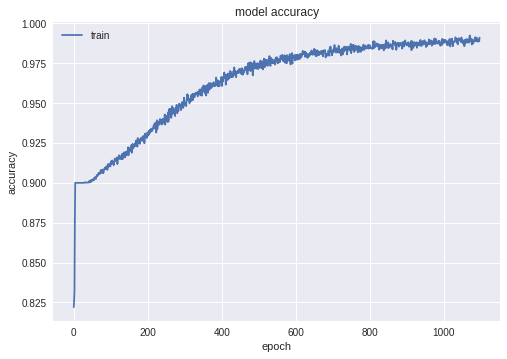

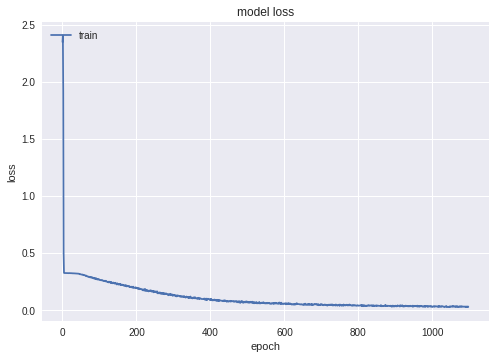

240/240 [==============================] - 0s 568us/step
Test loss: 0.38554561535517373
Test accuracy: 0.887499992052714
(240, 10)


ValueError: ignored

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=200, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1500,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

In [0]:
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

[[16  0  0  0  0  0  7  1  0  0]
 [12  2  0  1  3  5  0  0  1  0]
 [15  0  4  0  0  0  3  0  0  2]
 [14  0  0  2  1  1  2  0  1  3]
 [12  2  0  1  4  4  0  1  0  0]
 [12  1  0  1  1  9  0  0  0  0]
 [14  0  0  1  0  0  4  2  0  3]
 [15  1  1  2  1  2  0  2  0  0]
 [13  3  2  4  0  0  1  0  1  0]
 [16  1  0  0  0  0  3  1  0  3]]
              precision    recall  f1-score   support

           0       0.12      0.67      0.20        24
           1       0.20      0.08      0.12        24
           2       0.57      0.17      0.26        24
           3       0.17      0.08      0.11        24
           4       0.40      0.17      0.24        24
           5       0.43      0.38      0.40        24
           6       0.20      0.17      0.18        24
           7       0.29      0.08      0.13        24
           8       0.33      0.04      0.07        24
           9       0.27      0.12      0.17        24

   micro avg       0.20      0.20      0.20       240
   macro avg       

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]

#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])


#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
print(classes)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in classes:
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #print(len(R))
    train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)

r, r1 = np.where(trainy == 3)
train_x = np.delete(train_x, r, 0)
trainy = np.delete(trainy, r, 0)
classes = np.unique(trainy)
print(classes)


r, r1 = np.where(test_y == 3)
test_x = np.delete(test_x, r, 0)
test_y = np.delete(test_y, r, 0)
classes = np.unique(test_y)
print(classes)



r, r1 = np.where(val_y == 3)
val_x = np.delete(val_x, r, 0)
val_y = np.delete(val_y, r, 0)
classes = np.unique(val_y)
print(classes)

nClasses = len(classes)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(trainy)
test_y = enc.fit_transform(test_y)
val_y = enc.fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 4 5 6 7 8 9]
[0 1 2 4 5 6 7 8 9]
[0 1 2 4 5 6 7 8 9]
Train_y one hot: (882, 9)
Test_y one hot: (108, 9)
Val_y one hot: (162, 9)
(882, 800, 10)
(108, 800, 10)
(162, 800, 10)
Total number of outputs :  9
Output classes :  [0 1 2 4 5 6 7 8 9]
loaded data


Instructions for updating:
Use tf.cast instead.
Train on 882 samples, validate on 162 samples
Epoch 1/1000
 - 1s - loss: 2.7001 - acc: 0.8028 - mean_absolute_error: 0.1977 - val_loss: 2.8194 - val_acc: 0.8032 - val_mean_absolute_error: 0.1974
Epoch 2/1000
 - 1s - loss: 2.5854 - acc: 0.8081 - mean_absolute_error: 0.1923 - val_loss: 2.3383 - val_acc: 0.8162 - val_mean_absolute_error: 0.1842
Epoch 3/1000
 - 1s - loss: 2.4134 - acc: 0.8143 - mean_absolute_error: 0.1859 - val_loss: 2.1186 - val_acc: 0.8244 - val_mean_absolute_error: 0.1759
Epoch 4/1000
 - 0s - loss: 1.7629 - acc: 0.8197 - mean_absolute_error: 0.1832 - val_loss: 0.6090 - val_acc: 0.8477 - val_mean_absolute_error: 0.1824
Epoch 5/1000
 - 1s - loss: 0.4592 - acc: 0.8753 - mean_absolute_error: 0.1918 - val_loss: 0.3474 - val_acc: 0.8889 - val_mean_absolute_error: 0.1966
Epoch 6/1000
 - 1s - loss: 0.3479 - acc: 0.8886 - mean_absolute_error: 0.1968 - val_loss: 0.3472 - val_acc: 0.8889 - val_mean_absolute_error: 0.1970
Epoch 7/1000

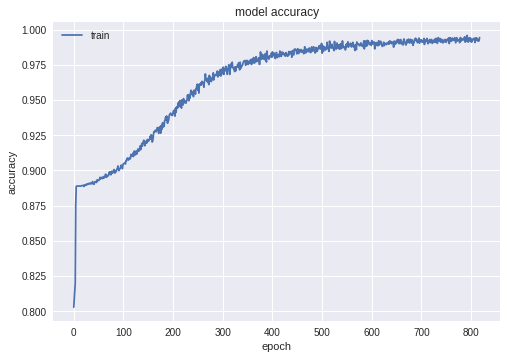

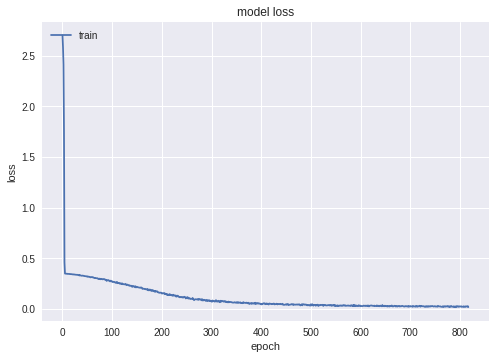

108/108 [==============================] - 0s 585us/step
Test loss: 0.36688350748132775
Test accuracy: 0.9115226423298871
(108, 9)


ValueError: ignored

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:120], predy))
print(classification_report(testy[0:120], predy))

In [0]:
pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
#predy = np.argmax(pred_y, axis=1).T
testy1 = enc.inverse_transform(test_y)
cm = confusion_matrix(testy1, predy)
print(cm)
print(classification_report(testy1, predy))

(108, 9)
[[ 7  0  3  1  0  0  0  0  1]
 [ 0  6  0  0  3  0  0  3  0]
 [ 1  0  6  0  0  3  1  0  1]
 [ 0  1  0  8  0  0  2  0  1]
 [ 0  1  0  0 11  0  0  0  0]
 [ 0  0  4  0  0  5  0  1  2]
 [ 3  0  0  2  0  0  5  0  2]
 [ 0  0  2  1  0  0  0  9  0]
 [ 2  0  0  0  0  2  1  0  7]]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.75      0.50      0.60        12
           2       0.40      0.50      0.44        12
           4       0.67      0.67      0.67        12
           5       0.79      0.92      0.85        12
           6       0.50      0.42      0.45        12
           7       0.56      0.42      0.48        12
           8       0.69      0.75      0.72        12
           9       0.50      0.58      0.54        12

   micro avg       0.59      0.59      0.59       108
   macro avg       0.60      0.59      0.59       108
weighted avg       0.60      0.59      0.59       108



In [0]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.58333333, 0.5       , 0.5       , 0.66666667, 0.91666667,
       0.41666667, 0.41666667, 0.75      , 0.58333333])